In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random
import time

In [2]:
def eratos(n):
	a = [0] * n
	for i in range(n):
		a[i] = i

	a[1] = 0
	m = 2
	while m < n:
		if a[m] != 0:
			j = m * 2
			while j < n:
				a[j] = 0
				j = j + m
		m += 1
	b = []
	for i in a:
		if a[i] != 0:
			b.append(a[i])
	del a
	return b[-1]

def atkins(limit):
	primes = [False] * limit
	sqrt_limit = int( math.sqrt( limit ) )

	x_limit = int( math.sqrt( ( limit + 1 ) / 2 ) )
	for x in range( 1, x_limit ):
		xx = x*x

		for y in range( 1, sqrt_limit ):
			yy = y*y
			n = 3*xx + yy
			if n < limit and n%12 == 7:
				primes[n] = not primes[n]
			n += xx
			if n < limit and n%12 in (1,5):
				primes[n] = not primes[n]
			if x > y:
				n -= xx + 2*yy
				if n < limit and n%12 == 11:
					primes[n] = not primes[n]

	for n in range(5,limit):
		if primes[n]:
			for k in range(n*n, limit, n*n):
				primes[k] = False
	l = list(filter(primes.__getitem__, range(5, limit)))

	return l[-1]
def generate_prime_eratos():
	n = random.randint(10000,1000000)
	p = eratos(n)
	return p

def generate_prime_atkin():
	n = random.randint(10000,1000000)
	p = atkins(n)
	return p
def generate_prime_bad():
	p = random.randint(10000,1000000)
	while not IsPrime(p):
		p = p + 1
	return p
def IsPrime(n):
	d = 2
	while n % d != 0:
		d += 1
	return d == n

In [16]:
bad = []
er = []
at = []
r = range(1,20)
for i in range(1,20):
	start_time = time.time()
	generate_prime_bad()
	bad.append(time.time() - start_time)
	generate_prime_eratos()
	er.append(time.time() - start_time)
	start_time = time.time()
	generate_prime_atkin()
	at.append(time.time() - start_time)

plt.plot(r,er)
plt.plot(r,at)
plt.show()

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 9)

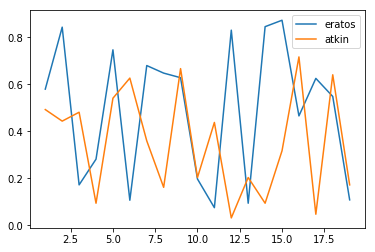

In [45]:
bad = []
er = []
at = []
r = range(1,20)
for i in range(1,20):
	start_time = time.time()
	generate_prime_eratos()
	er.append(time.time() - start_time)
	start_time = time.time()
	generate_prime_atkin()
	at.append(time.time() - start_time)
    
plt.plot(r,er, label='eratos')
plt.plot(r,at, label='atkin')
plt.legend()
plt.show()

In [31]:
print(generate_prime_bad(),generate_prime_eratos(),generate_prime_atkin())

774511 863017 892901


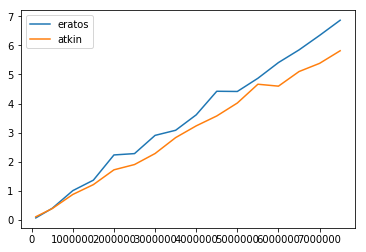

In [40]:
er = []
at = []
r = [1000000,1500000,2000000,2500000,3000000,3500000,4000000,4500000,5000000,5500000,6000000,6500000,7000000,7500000]
for i in r:
    start_time = time.time()
    atkins(i)
    at.append(time.time() - start_time)
    start_time = time.time()
    eratos(i)
    er.append(time.time() - start_time)
    
plt.plot(r,er, label='eratos')
plt.plot(r,at, label='atkin')
plt.legend()
plt.show()

In [1]:
er = []
at = []
r = [100000,150000,200000,250000,300000,350000,400000,450000,500000,550000,600000,650000,700000,750000]
for i in r:
    start_time = time.time()
    atkins(i)
    at.append(time.time() - start_time)
    start_time = time.time()
    eratos(i)
    er.append(time.time() - start_time)
    
plt.plot(r,er, label='eratos')
plt.plot(r,at, label='atkin')
plt.legend()
plt.show()

NameError: name 'time' is not defined

In [3]:
def encrypt(message,open_k):
	p = open_k[1]
	g = open_k[0]
	y = open_k[2]
	k = random.randint(1, p)
	cipher = []
	#message = 764
	a = pow(g,k,p)
	b = ((y^k)* message)% p
	cipher.append(a)
	cipher.append(b)
	y = 0
	k = 0
	return (cipher, open_k, close_k)

#Дешифрование числа
def decipher(cipher,open_key,close_key):
	a = cipher[0]
	b = cipher[1]
	m = int(b / (a^int(close_key) % int(open_key[1])))
	return(m)

#Шифрование списка чисел
def encrypt_list(message,open_k,close_k):
	p = open_k[1]
	g = open_k[0]
	y = open_k[2]
	k = random.randint(1, p)
	cipher = []
	a = g^k % p
	b = y^k % p
	for i in message:
		r = []
		c = b* i
		r.append(a)
		r.append(c)
		cipher.append(r)
	y = 0
	k = 0
	return (cipher, open_k, close_k)

#Дешифрование списка чисел
def decipher_list(cipher,open_key,close_key):
	dem = []
	for i in cipher:
		a = i[0]
		b = i[1]
		m = int(b / (a^int(close_key) % int(open_key[1])))
		dem.append(m)
	return(dem)

#Шифрование строки
def encrypt_text(message,open_k):
	m = []
	for i in message:
		m.append(ord(i))
	p = open_k[1]
	g = open_k[0]
	y = open_k[2]
	k = random.randint(1, p)
	cipher = []
	a = g^k % p
	b = y^k % p
	for i in m:
		r = []
		c = b* i
		r.append(a)
		r.append(c)
		cipher.append(r)
	y = 0
	k = 0
	return cipher

#Дешифрование строки
def decipher_text(cipher,open_key,close_key):
	dem = []
	decipherment = ""
	for i in cipher:
		a = i[0]
		b = i[1]
		m = int(b / (a^int(close_key) % int(open_key[1])))
		dem.append(m)
	for i in dem:
		decipherment = decipherment + chr(i)
	return decipherment

#Преобразование строки в список
def from_str2lst(st):
	m = []
	for i in range(len(st)-2):
		if st[i] == "[":
			a = 0
			c = []
		if st[i] >= "0" and st[i] <= "9":
			a = a*10 + int(st[i])
			if st[i + 1] == ",":
				c.append(a)
				a = 0
			if st[i + 1] == "]":
				c.append(a)
				m.append(c)
	a = m[-1]
	m = [m[:-1]]
	m.append(a)
	return m

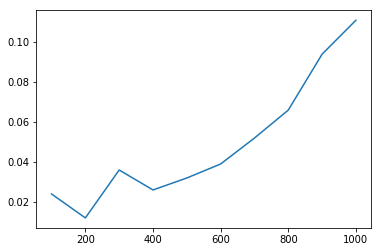

In [28]:
f = "Мой дядя самых честных правил-"
close_key = 6528
open_key = [4558,7237,2126]
m = f*100
times = []
for i in range (0,10):
    start_t = time.time()
    m = m + f*(i*100)
    cip = encrypt_text(m,open_key)
    t = time.time() - start_t
    times.append(t)

r = [100,200,300,400,500,600,700,800,900,1000]
plt.plot(r,times)

plt.show()

In [25]:
r = range(10000)
r

range(0, 10000)